In [1]:
import numpy as np
from LDA import BinaryLDA
from QDA import BinaryQDA
from NB import BinaryNB
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def get_acc(model_class, X_train, y_train, X_test, y_test):
    model = model_class()
    model.fit(X_train, y_train)
    y_model = model.predict(X_test)
    model_acc = np.sum(y_model == y_test) / y_test.shape[0]
    return model_acc

In [3]:
def box_plot_compare(a_values, rho):
    num_experiments = 100
    n = 1000
    n_train = round(n * 0.8)
    # a_values = [0.1, 0.5, 1, 2, 3, 5]
    # rho = 0.5

    data = []
    for idx, a in enumerate(a_values):
        
        n0 = np.random.binomial(n, 0.5)
        n1 = n - n0
        y = np.array([0] * n0 + [1] * n1)
        X_0 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, rho], [rho, 1]], size=n0)
        X_1 = np.random.multivariate_normal(mean=[a, a], cov=[[1, -rho], [-rho, 1]], size=n1)
        X = np.concat([X_0, X_1])

        for i in range(num_experiments):
            idx_array = np.array(range(n))
            np.random.shuffle(idx_array)
            X_shuffled = X[idx_array, :]
            y_shuffled = y[idx_array]

            X_train = X_shuffled[:n_train, :]
            X_test = X_shuffled[n_train:, :]
            y_train = y_shuffled[:n_train]
            y_test = y_shuffled[n_train:]

            lda_acc = get_acc(BinaryLDA, X_train, y_train, X_test, y_test)
            qda_acc = get_acc(BinaryQDA, X_train, y_train, X_test, y_test)
            nb_acc = get_acc(BinaryNB, X_train, y_train, X_test, y_test)

            data.append({'a value': a, 'Model': 'LDA', 'Accuracy': lda_acc})
            data.append({'a value': a, 'Model': 'QDA', 'Accuracy': qda_acc})
            data.append({'a value': a, 'Model': 'NB', 'Accuracy': nb_acc})

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='a value', y='Accuracy', hue='Model', data=pd.DataFrame(data), palette={'LDA': 'lightblue', 'QDA': 'lightgreen', 'NB': 'lightcoral'})
    plt.show()

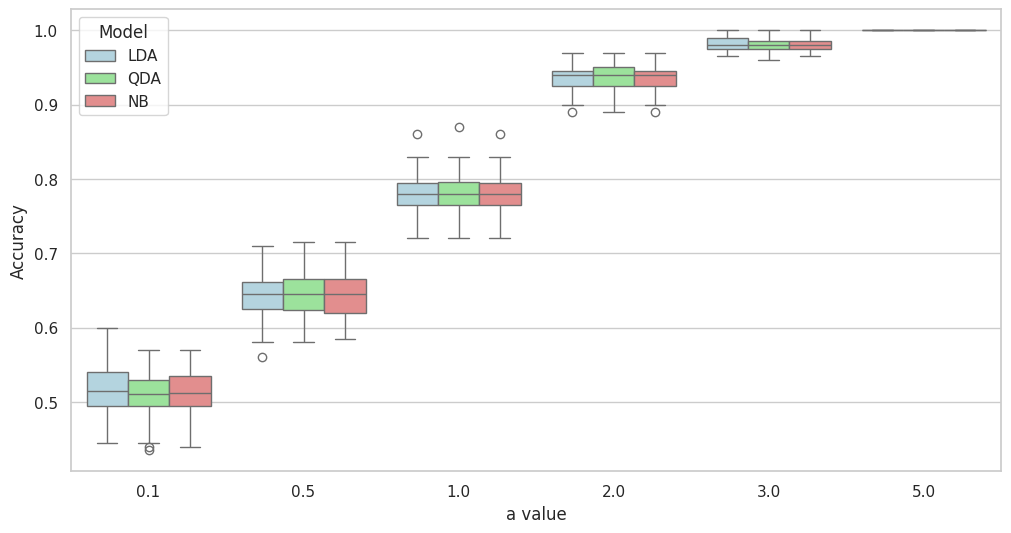

In [4]:
box_plot_compare([0.1, 0.5, 1, 2, 3, 5], 0)

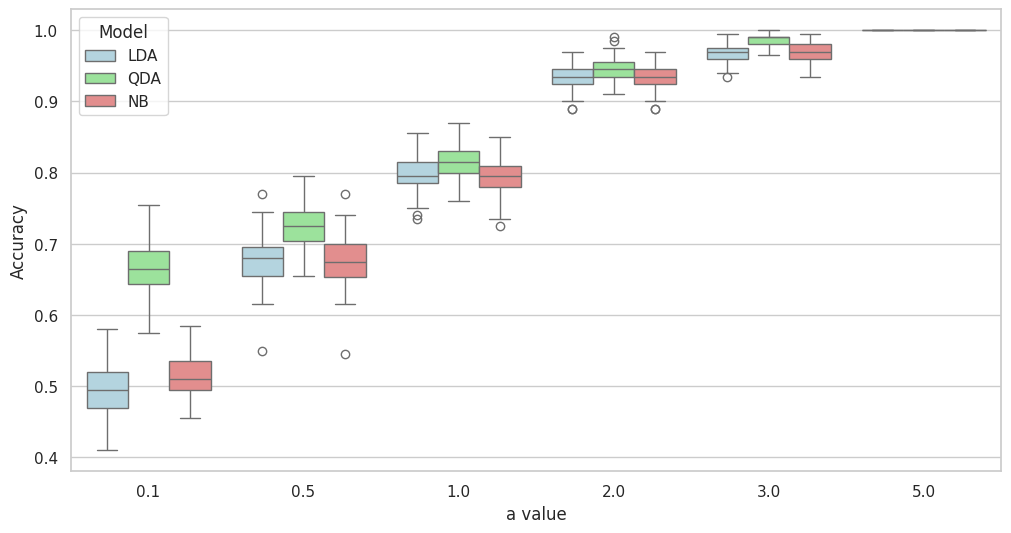

In [5]:
box_plot_compare([0.1, 0.5, 1, 2, 3, 5], 0.5)